# Planet distributions

This notebook calculates the number of planets per log semi-major axis and log M for the main sequence and around white dwarfs with $1M_\odot$ and $1.5M_\odot$ progenitors using the results of a post main sequence planetary system evolution simulation. The main sequence planet occurrence rate is the epos symmetric fit from Fernandes et al. ‘Hints for a Turnover at the Snow Line in the Giant Planet Occurrence Rate’. The Astrophysical Journal 874, no. 1 (26 March 2019): 81. https://doi.org/10.3847/1538-4357/ab0300. The bins used for the detection probabilities are from data provided by Piero Ranalli converting Fig. 5 in Ranalli, Piero, David Hobbs, and Lennart Lindegren. 2018. ‘Astrometry and Exoplanets in the Gaia Era: A Bayesian Approach to Detection and Parameter Recovery’. Astronomy & Astrophysics 614 (June): A30. https://doi.org/10.1051/0004-6361/201730921 to square bins.


The white dwarf planet distribution, errors and bin edges are saved as csv files in the distribution folder.

**Version Info**
This version enables you make plots with a variable number of a_bins for the distributions as well as using the Ranalli bins. v2 is streamlined just for the Ranalli (2018) bins.

**Units**
+ a - au
+ logM is log (M/Mj)
+ M - Mj

**Ongoing Issues**
Setting with copy warning when defining a new column in data frame. Am using .loc as suggested but still getting a warning and I don't know why. I don't think it is a problem as have not redefined variables at any point so am ignoring it.

## Table of Contents:  <a class="anchor" id="top"></a>
* [Set-up](#setup)
    + [Import modules](#modules)
    + [Import data](#data)
    + [Choose number of bins](#bins)
* [Main sequence planet occurrence rate](#main-sequence)
    + [Distribution functions](#main-sequence-functions)
    + [Main sequence figure 4](#main-sequence-plot)
* [White dwarf planet distribution](#wd-dist)
    + [Calculations for plots and numerical comparison](#plot-calc)
    + [Plots for paper](#wd-plots)
         + [Gaia detection limits](#gaia-lim)
         + [1Msol progenitor - figure 5](#1Msol-plot)
         + [1.5Msol progenitor - figure 6](#1.5Msol-plot)
    + [Comparison of MS and post MS occurrence rates](#comparison)
    + [White dwarf distribution for use with detection probabilities](#final-distribution)
        + [Save data for use with detection probabilities](#save)

# Set-up <a class="anchor" id="set-up"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

## Import modules <a class="anchor" id="modules"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

## Import simulation data <a class="anchor" id="data"></a>

In [2]:
#from import_data_fn import import_data_1

In [3]:
from import_data_fn import import_data_1

In [4]:
from import_data_fn2 import import_data_1p5

In [5]:
data=import_data_1(True,True,True,'')

In [6]:
data1p5=import_data_1p5(True,True,True,'') #same as above but for 1.5Msol progenitor

## Choose number of histogram bins <a class="anchor" id="bins"></a>

In [7]:
nbins_a=50
nbins_m=31

# Main sequence planet occurrence rate <a class="anchor" id="main-sequence"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

Calculate $\left(\frac{d^2N_{MS}}{dloga\,dlogM}\right)_{ik}$

Create a histogram with the same number of bins and minimum/maximum values as our simulation data where the value of each bin is the main sequence planet occurrence rate.

a_edges and m_edges are set here and then used for all calculations until replaced by Ranalli edges

In [8]:
hist_val, a_edges, m_edges=np.histogram2d(data['a_i'],data['logM'],bins=[nbins_a,nbins_m]) #find histogram - last bin is [a, amax] i.e. max value is included

In [9]:
hist_val_1p5, a_edges_1p5, m_edges_1p5=np.histogram2d(data1p5['a_i'],data1p5['logM'],bins=[nbins_a,nbins_m]) #find histogram - last bin is [a, amax] i.e. max value is included

## Import functions for main sequence planet occurrence rate and error <a class="anchor" id="main-sequence-functions"></a>

In [10]:
from planet_occurrence_full import fern_plan_occ

In [11]:
from fernandes_planet_error import fern_plan_error

In [12]:
#create an array with same dimensions as hist_val
occ_val=np.zeros(np.shape(hist_val))
error_val=np.zeros(np.shape(hist_val))
plot_occ_val=np.zeros(np.shape(hist_val)) #same thing but will be scaled by a/log10(e) so d^2N/da dlogM for plotting
a_mid=(a_edges[1:]+a_edges[:-1])/2
m_mid=(m_edges[1:]+m_edges[:-1])/2

m_mid_unlog=(10**m_mid)
for i in range(len(m_mid)):
    occ_val[:,i]=fern_plan_occ(a_mid,m_mid_unlog[i])
    error_val[:,i]=fern_plan_error(a_mid,m_mid_unlog[i])
    plot_occ_val[:,i]=occ_val[:,i]*a_mid/np.log10(np.exp(1))

Repeat for $1.5M_\odot$ progenitor. Has different a bins so need to repeat

In [13]:
#create an array with same dimensions as hist_val for 1p5
occ_val_1p5=np.zeros(np.shape(hist_val_1p5))
error_val_1p5=np.zeros(np.shape(hist_val_1p5))
plot_occ_val_1p5=np.zeros(np.shape(hist_val_1p5)) #same thing but will be scaled by a/log10(e) so d^2N/da dlogM for plotting
a_mid_1p5=(a_edges_1p5[1:]+a_edges_1p5[:-1])/2

for i in range(len(m_mid)):
    occ_val_1p5[:,i]=fern_plan_occ(a_mid_1p5,m_mid_unlog[i])
    error_val_1p5[:,i]=fern_plan_error(a_mid_1p5,m_mid_unlog[i])
    plot_occ_val_1p5[:,i]=occ_val_1p5[:,i]*a_mid_1p5/np.log10(np.exp(1))

## Distribution plot in paper <a class="anchor" id="main-sequence-plot"></a>

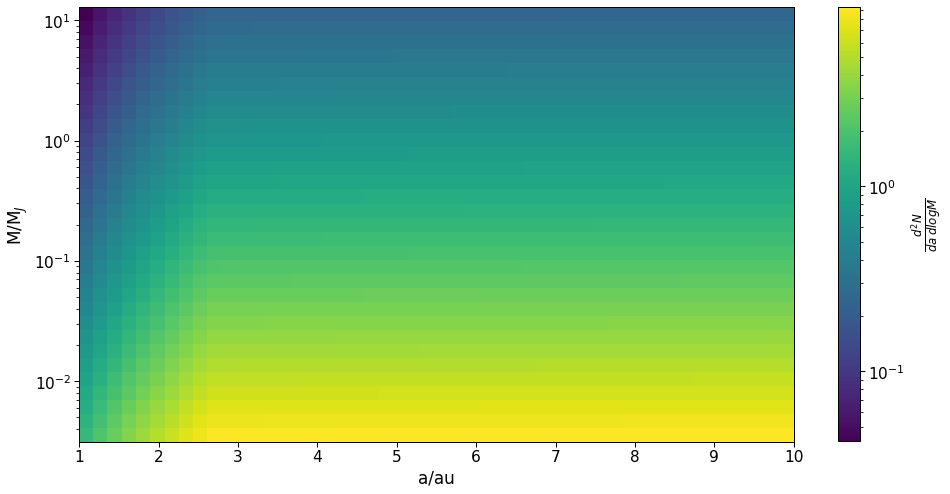

In [14]:
with sns.plotting_context('paper',font_scale=1.75):
    plt.figure(figsize=[16,8])
    plt.pcolormesh(a_edges,10**m_edges,np.transpose(plot_occ_val),norm=mcolors.LogNorm()) # use same vmin and vmax as other plots to make them comparable
    plt.yscale('log')
    plt.xlabel('a/au')
    plt.ylabel('M/M$_J$')
    #plt.title('Number of planets per log semi-major axis and log M on the main sequence')
    plt.colorbar(label=r'$\frac{d^2N}{da\:dlogM}$')
    #plt.savefig('../../Plots/main_sequence_planet_distribution.pdf',bbox_inches='tight')

# White dwarf planet occurrence rate <a class="anchor" id="wd-dist"></a> 
<p align="right">(<a href="#top">back to top</a>)</p>

**Step 1** Calculate count_weight $C_{ik}=\left(\frac{d^2N_{MS}}{dloga\,dlogM}\right)_{ik}\frac{1}{B_{ik}}$ for each simulated planet. $\frac{1}{B_{ik}}$ is number of planets in ik bin.
$\sigma_{C_{ik}}=\frac{1}{B_{ik}}\sigma\left(\frac{d^2N_{MS}}{dloga\,dlogM}\right)_{ik}$. i= main sequence semi-major axis bin, j= white dwarf semi-major axis bin, k = mass bin

First find the bin each planet belongs in. Do for 1$M_\odot$ and 1.5 $M_\odot$ progenitors.

In [15]:
data.loc[:,'ai_index']=np.digitize(data['a_i'],a_edges) #find index of bin it belongs to in initial a space
data.loc[:,'m_index']=np.digitize(data['logM'],m_edges) #find index of bin it belongs to in m space

In [16]:
data1p5.loc[:,'ai_index']=np.digitize(data1p5['a_i'],a_edges_1p5) #find index of bin it belongs to in initial a space
data1p5.loc[:,'m_index']=np.digitize(data1p5['logM'],m_edges) #find index of bin it belongs to in m space

In [17]:
#have to relabel as digitize does not include the largest bin edge it does [a amax) so need to down label
data.loc[(data.ai_index == (nbins_a+1)),'ai_index']=nbins_a
data.loc[(data.m_index == (nbins_m+1)),'m_index']=nbins_m

In [18]:
#have to relabel as digitize does not include the largest bin edge it does [a amax) so need to down label
data1p5.loc[(data1p5.ai_index == (nbins_a+1)),'ai_index']=nbins_a
data1p5.loc[(data1p5.m_index == (nbins_m+1)),'m_index']=nbins_m

In [19]:
#create a new column for weighting which is the planet occurrence rate in that bin divided by number of planets in that bin
#also create a column for the error (see above)
data.loc[:,'count_weight']=occ_val[(data['ai_index']-1),(data['m_index']-1)]/hist_val[(data['ai_index']-1),(data['m_index']-1)] 
data.loc[:,'cw_error']=error_val[(data['ai_index']-1),(data['m_index']-1)]/hist_val[(data['ai_index']-1),(data['m_index']-1)]

In [20]:
#create a new column for weighting which is the planet occurrence rate in that bin divided by number of planets in that bin
#also create a column for the error (see above)
data1p5.loc[:,'count_weight']=occ_val_1p5[(data1p5['ai_index']-1),(data1p5['m_index']-1)]/hist_val_1p5[(data1p5['ai_index']-1),(data1p5['m_index']-1)] 
data1p5.loc[:,'cw_error']=error_val_1p5[(data1p5['ai_index']-1),(data1p5['m_index']-1)]/hist_val_1p5[(data1p5['ai_index']-1),(data1p5['m_index']-1)]

**Step 2** Calculate $\left(\frac{d^2N_{WD}}{dloga\,dlogM}\right)_{jk}=\Sigma_iR_{ijk}C_{ik}$ where $R_{ijk}$ is the number of planets from the $ik^{th}$ bin on the main sequence that end up in the $jk^{th}$ bin in the white dwarf phase.

Remove engulfed planets

In [21]:
data_ne=data[data['status']==0] #remove engulfed planets
data_ne1p5=data1p5[data1p5['status']==0] #remove engulfed planets

Calculate a histogram of final positions of simulated planets to get the value of $R_{ijk}$ and $\sigma(R_{ijk})=\sqrt{R_{ijk}}$ assuming Poissonian for the error analysis

In [22]:
Rijk_1p0, a_edges, m_edges=np.histogram2d(data_ne['a_f'],data_ne['logM'],bins=[a_edges,m_edges])

In [23]:
Rijk_1p5, a_edges_1p5, m_edges=np.histogram2d(data_ne1p5['a_f'],data_ne1p5['logM'],bins=[a_edges_1p5,m_edges])

In [24]:
data_ne.loc[:,'af_index']=np.digitize(data_ne.loc[:,'a_f'],a_edges) #find index of bin it belongs to in final a space
data_ne1p5.loc[:,'af_index']=np.digitize(data_ne1p5.loc[:,'a_f'],a_edges_1p5) #find index of bin it belongs to in final a space

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [25]:
#have to relabel as digitize does not include the largest bin edge it does [a amax) so need to down label
# think the error comes as loc and conditional statements are not very happy
data_ne1p5.loc[(data_ne1p5.af_index == (nbins_a+1)),'af_index']=nbins_a
data_ne1p5.loc[(data_ne1p5.m_index == (nbins_m+1)),'mf_index']=nbins_m

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [26]:
data_ne.loc[:,'Rijk']=Rijk_1p0[(data_ne.loc[:,'ai_index']-1),(data_ne.loc[:,'m_index']-1)] 
data_ne1p5.loc[:,'Rijk']=Rijk_1p5[(data_ne1p5.loc[:,'ai_index']-1),(data_ne1p5.loc[:,'m_index']-1)]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


$\sigma(R_{ijk}C_{ik})=R_{ijk}C_{ik}\sqrt{\left(\frac{\sigma R_{ijk}}{R_{ijk}}\right)^2+\left(\frac{\sigma C_{ik}}{C_{ik}}\right)^2}$ fractional error in quadrature as there is multiplication.


$\sigma R_{ijk}$ is Poissonian so $\sqrt{R_{ijk}}$. However, if $R_{ijk}=0$ then the fractional error is infinite but this doesn't matter as doesn't contribute to the jth bin so will convert nan numbers to 0

In [27]:
data_ne.loc[:,'RC_error']=data_ne['Rijk']*data_ne['count_weight']*np.sqrt(1/data_ne['Rijk']+(data_ne['cw_error']/data_ne['count_weight'])**2)
data_ne.loc[:,'RC_error']=data_ne['RC_error'].fillna(0)
data_ne1p5.loc[:,'RC_error']=data_ne1p5['Rijk']*data_ne1p5['count_weight']*np.sqrt(1/data_ne1p5['Rijk']+(data_ne1p5['cw_error']/data_ne1p5['count_weight'])**2)
data_ne1p5.loc[:,'RC_error']=data_ne1p5['RC_error'].fillna(0)

Using np.histogram2d with count_weight is same as summing over $R_{ijk}C_{ik}$.

$\sigma(\frac{d^2N_{WD}}{dloga\,dlogM})_{jk}=\sqrt{\Sigma_i \sigma(R_{ijk}C_{ik})^2}$ absolute error in quadrature as summation

In [28]:
hist_val_wd, a_edges_1p0, m_edges=np.histogram2d(data_ne['a_f'],data_ne['logM'],weights=data_ne['count_weight'],bins=[a_edges,m_edges])
error_val_wd_square, a_edges, m_edges=np.histogram2d(data_ne['a_f'],data_ne['logM'],weights=data_ne['RC_error']**2,bins=[a_edges,m_edges])
error_val_wd=np.sqrt(error_val_wd_square)

In [29]:
hist_val_wd_1p5, a_edges_1p5, m_edges=np.histogram2d(data_ne1p5['a_f'],data_ne1p5['logM'],weights=data_ne1p5['count_weight'],bins=[a_edges_1p5,m_edges])
error_val_wd_1p5_square, a_edges, m_edges=np.histogram2d(data_ne1p5['a_f'],data_ne1p5['logM'],weights=data_ne1p5['RC_error']**2,bins=[a_edges_1p5,m_edges])
error_val_wd_1p5=np.sqrt(error_val_wd_1p5_square)

## Plots for paper <a class="anchor" id="wd-plots"></a> 
<p align="right">(<a href="#top">back to top</a>)</p>

### Import Gaia detection limits <a class="anchor" id="gaia-lim"></a> 

In [30]:
from Appendix.Gaia_detection_limits_app import mass_detect_fn

In [31]:
a_in=np.linspace(0,10,100) #create array for calculating detection limits
d1=mass_detect_fn(a_in[1:],3,20,15,'../') #s/n=3, d=20pc, mag=15
d2=mass_detect_fn(a_in[1:],3,40,15,'../') #s/n=3, d=40pc, mag=15

On the plot we want to show $\frac{d^2N_{WD}}{da\,dlogM}$ so need to multiply all the values by $\frac{a}{log_{10}(e)}$

In [32]:
#define M bins are equal in log space
mbins_log=np.histogram_bin_edges(data_ne['logM'],nbins_m) #equal bins in log space
mbins_unlog=10**mbins_log

### 1Msol distribution plot <a class="anchor" id="1Msol-plot"></a> 
<p align="right">(<a href="#top">back to top</a>)</p>

In [33]:
a_bins_b=np.linspace(0,10,nbins_a) #ensure number of bins ensures there are a few planets per bin initially

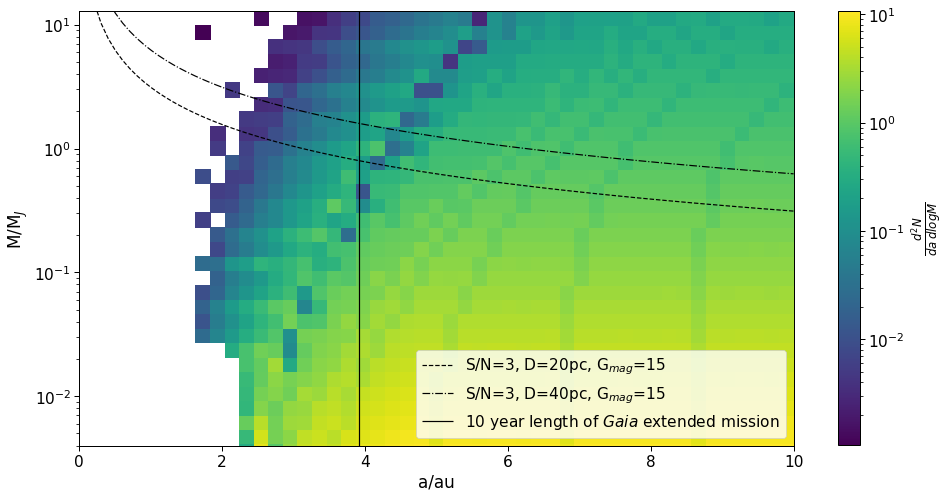

In [34]:
with sns.plotting_context('paper',font_scale=1.75):
    plt.figure(figsize=[16,8])
    plt.hist2d(data_ne['a_f'],data_ne['M'],weights=data_ne['count_weight']*data_ne['a_f']/np.log10(np.exp(1)),bins=[a_bins_b,mbins_unlog],norm=mcolors.LogNorm())
    #plt.scatter(data_ne['a_f'],data_ne['M'],c='black',marker='x') #can add scatter of final positions if you want
    plt.plot(a_in[1:],d1,color='black',linestyle='--',label='S/N=3, D=20pc, G$_{mag}$=15')
    plt.plot(a_in[1:],d2,color='black',linestyle='-.',label='S/N=3, D=40pc, G$_{mag}$=15')
    plt.yscale('log')
    plt.vlines(3.91,min(data_ne['M']),max(data_ne['M']),color='black',linestyle='-',label='10 year length of $Gaia$ extended mission')
    plt.xlabel('a/au')
    plt.ylabel('M/M$_J$')
    plt.xlim([0,10])
    plt.ylim([4e-3,13])
    plt.legend(loc='lower right')
    #plt.title('Number of planets around a white dwarf per log semi-major axis and log M for a 1M$_\odot$ progenitor')
    #plt.text(8.1,-1.5,'a bins={} \nlog M bins={}'.format(nbins_a,nbins_m),color='black',bbox=dict(boxstyle='square', fc="w", ec="w",alpha=0.8))
    plt.colorbar(label=r'$\frac{d^2N}{da\:dlogM}$')
    #plt.savefig('../../Plots/final_planet_distribution1p0_final.pdf',bbox_inches='tight')
    

### 1.5 Msol plot <a class="anchor" id="1.5Msol-plot"></a> 
<p align="right">(<a href="#top">back to top</a>)</p>
This is figure 6

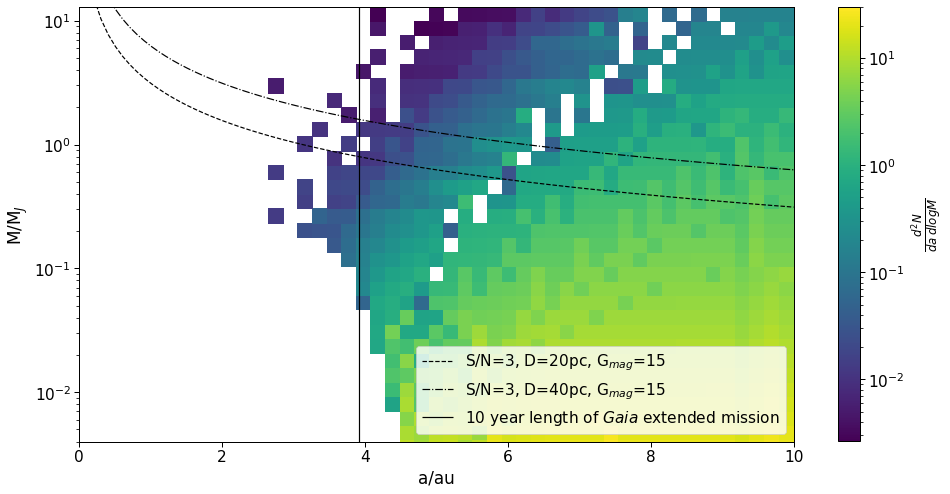

In [35]:
with sns.plotting_context('paper',font_scale=1.75):
    plt.figure(figsize=[16,8])
    plt.hist2d(data_ne1p5['a_f'],data_ne1p5['M'],weights=data_ne1p5['count_weight']*data_ne1p5['a_f']/np.log10(np.exp(1)),bins=[a_bins_b,mbins_unlog],norm=mcolors.LogNorm())
    plt.plot(a_in[1:],d1,color='black',linestyle='--',label='S/N=3, D=20pc, G$_{mag}$=15')
    plt.plot(a_in[1:],d2,color='black',linestyle='-.',label='S/N=3, D=40pc, G$_{mag}$=15')
    plt.yscale('log')
    plt.vlines(3.91,min(data_ne1p5['M']),max(data_ne1p5['M']),color='black',linestyle='-',label='10 year length of $Gaia$ extended mission')
    plt.xlabel('a/au')
    plt.ylabel('M/M$_J$')
    plt.xlim([0,10])
    plt.ylim([4e-3,13])
    plt.legend(loc='lower right')
    #plt.title('Number of planets around a white dwarf per log semi-major axis and log M for a 1.5M$_\odot$ progenitor')
    #plt.text(8.2,-1.5,'a bins={} \nlogM bins={}'.format(nbins_a,nbins_m),color='black',bbox=dict(boxstyle='square', fc="w", ec="w",alpha=0.8))
    plt.colorbar(label=r'$\frac{d^2N}{da\:dlogM}$')
    #plt.savefig('../../Plots/final_planet_distribution1p5.pdf',bbox_inches='tight')

## Comparison of main sequence and white dwarf planet occurrence rates <a class="anchor" id="comparison"></a> 
<p align="right">(<a href="#top">back to top</a>)</p>

We want to compare the number of planets inside 3.91 au on the main sequence and around white dwarfs with 1$M_\odot$ and 1.5$M_\odot$ progenitors.

First create a function which will sum over the values in the histograms weighted by dloga dlogm where both logs are to base 10

In [36]:
def new_heatmap_sum(hist_val,error_val,edge1,edge2):
    """
    Function  to compute sum of heatmap and error weighted by dloga and dlogm
    :params hist_val: array, values from np.histogram
    :params error_val: array, values of error from histogram
    :params edge1: array, bin edges in 1st dimension, unevenly distributed in log space, unlogged values
    :params edge2: array, bin edges in 2nd dimension, un/evenly distributed in log space, logged values
    
    :returns total: float, total sum of values in heatmap weighted by dloga and dlogm
    :returns error: float, error on total
    """
    dloga=np.log10(np.exp(1))*2*np.ediff1d(edge1)/(edge1[:-1]+edge1[1:]) #dloga=log10(e)da/a - find a from averaging sucessive values
    dlogm=np.ediff1d(edge2) #dlogm need to account for non uniform spacing
    hist_val_scaled=np.zeros([len(edge1)-1,len(edge2)-1])
    error_val_scaled=np.zeros([len(edge1)-1,len(edge2)-1])
    for i in range(len(edge2)-1):
        hist_val_scaled[:,i]=hist_val[:,i]*dloga*abs(dlogm[i]) #have to multiply by bin width as doing a discrete integral, take absolute value as dlogm can be negative
        error_val_scaled[:,i]=error_val[:,i]*dloga*abs(dlogm[i])
    total=np.sum(hist_val_scaled)
    error=np.sqrt(np.sum(error_val_scaled**2))
    return total, error

Second find the index of 3.91 au in the histogram edges.

In [37]:
a_max=3.91 #[au]
amax_ind=np.digitize(a_max,a_edges,right=True) #find index of bin it belongs to in a space
amax_ind_1p0=np.digitize(a_max,a_edges_1p0,right=True) #find index of bin it belongs to in a space
amax_ind_1p5=np.digitize(a_max,a_edges_1p5,right=True) #find index of bin it belongs to in a space

Third, sum over all masses and this small indices. 

In [38]:
tot_ms2, e_ms2 = new_heatmap_sum(occ_val,error_val,a_edges,m_edges)
print('There are {:.2f} +\- {:.2f} planets per star on the main sequence in the plotted range'.format(tot_ms2,e_ms2))

There are 0.61 +\- 0.01 planets per star on the main sequence in the plotted range


In [39]:
tot_ms, e_ms = new_heatmap_sum(occ_val[:amax_ind-1,:],error_val[:amax_ind-1,:],a_edges[:amax_ind],m_edges)
tot_1p0, e_1p0 = new_heatmap_sum(hist_val_wd[:amax_ind_1p0-1,:],error_val_wd[:amax_ind_1p0-1,:],a_edges_1p0[:amax_ind_1p0],m_edges)
tot_1p5, e_1p5 = new_heatmap_sum(hist_val_wd_1p5[:amax_ind_1p5-1,:],error_val_wd_1p5[:amax_ind_1p5-1,:],a_edges_1p5[:amax_ind_1p5],m_edges)
print('There are {:.2f} +\- {:.2f} planets per star on the main sequence within 3.91 au'.format(tot_ms,e_ms))
print('There are {:.3f} +\- {:.3f} planets per star around white dwarfs with a 1Msol progenitor within 3.91 au'.format(tot_1p0,e_1p0))
print('There are {:.2e} +\- {:.0e} planets per star around white dwarfs with a 1.5Msol progenitor within 3.91 au'.format(tot_1p5,e_1p5))

There are 0.56 +\- 0.01 planets per star on the main sequence within 3.91 au
There are 0.091 +\- 0.005 planets per star around white dwarfs with a 1Msol progenitor within 3.91 au
There are 9.84e-05 +\- 1e-06 planets per star around white dwarfs with a 1.5Msol progenitor within 3.91 au


## White dwarf distribution for combination with detection probabilities <a class="anchor" id="final-distribution"></a> 
<p align="right">(<a href="#top">back to top</a>)</p>

To combine these planet distributions with detection probabilities will need to rebin and repeat the calculations above but using the same semi-major axis bins as Ranalli. m_edges are unchanged. Only need to do this around $1M_\odot$ progenitor as not enough survives around $1.5M_\odot$ progenitors but have done both here in case.

In [40]:
#Ranalli's bins
mwd=0.6
yedges10yr = np.array([-1.1  , -1.025, -0.95 , -0.875, -0.8  , -0.725, -0.65 , -0.575, \
       -0.5  , -0.425, -0.35 , -0.275, -0.2  , -0.125, -0.05 ,  0.025, \
        0.1  ,  0.175,  0.25 ,  0.325,  0.4  ,  0.475,  0.55 ,  0.625, \
        0.7  ,  0.775,  0.85 ,  0.925,  1.   ,  1.075,  1.15 ,  1.225, \
        1.3  ,  1.375])
unlogP=10**yedges10yr
a_edges_ran=(mwd*(unlogP)**2)**(1/3)
nbins_ar=len(a_edges_ran)-1

Recalculate main sequence occurrence rate for Ranalli bins.

In [41]:
#create an array with same dimensions as hist_val
occ_val_r=np.zeros([nbins_ar,nbins_m])
error_val_r=np.zeros([nbins_ar,nbins_m])
a_mid_r=(a_edges_ran[1:]+a_edges_ran[:-1])/2

for i in range(len(m_mid)):
    occ_val_r[:,i]=fern_plan_occ(a_mid_r,m_mid_unlog[i])
    error_val_r[:,i]=fern_plan_error(a_mid_r,m_mid_unlog[i])

Recalculate histogram around white dwarf with Ranalli bins. Have to use different hist_val for the two progenitors as simulation positions are different.

In [42]:
hist_val_r, a_edges_ran, m_edges=np.histogram2d(data['a_i'],data['logM'],bins=[a_edges_ran,nbins_m]) #find histogram - last bin is [a, amax] i.e. max value is included

In [43]:
hist_val_1p5r, a_edges_ran, m_edges=np.histogram2d(data1p5['a_i'],data1p5['logM'],bins=[a_edges_ran,nbins_m]) #find histogram - last bin is [a, amax] i.e. max value is included

Find a indices of each value

In [44]:
data.loc[:,'ai_index_ran']=np.digitize(data['a_i'],a_edges_ran) #find index of bin it belongs to in initial a space
data1p5.loc[:,'ai_index_ran']=np.digitize(data1p5['a_i'],a_edges_ran) #find index of bin it belongs to in initial a space

In [45]:
#have to relabel as digitize does not include the largest bin edge it does [a amax) so need to down label
data.loc[(data.ai_index_ran == (nbins_ar+1)),'ai_index_ran']=nbins_ar
data1p5.loc[(data1p5.ai_index_ran == (nbins_ar+1)),'ai_index_ran']=nbins_ar

In [46]:
#create a new column for weighting which is the planet occurrence rate in that bin divided by number of planets in that bin
#also create a column for the error (see above)
data.loc[:,'count_weight_ran']=occ_val_r[(data['ai_index_ran']-1),(data['m_index']-1)]/hist_val_r[(data['ai_index_ran']-1),(data['m_index']-1)] 
data.loc[:,'cw_error_ran']=error_val_r[(data['ai_index_ran']-1),(data['m_index']-1)]/hist_val_r[(data['ai_index_ran']-1),(data['m_index']-1)]

In [47]:
#create a new column for weighting which is the planet occurrence rate in that bin divided by number of planets in that bin
#also create a column for the error (see above)
data1p5.loc[:,'count_weight_ran']=occ_val_r[(data1p5['ai_index_ran']-1),(data1p5['m_index']-1)]/hist_val_1p5r[(data1p5['ai_index_ran']-1),(data1p5['m_index']-1)] 
data1p5.loc[:,'cw_error_ran']=error_val_r[(data1p5['ai_index_ran']-1),(data1p5['m_index']-1)]/hist_val_1p5r[(data1p5['ai_index_ran']-1),(data1p5['m_index']-1)]

In [48]:
data_ne_ran=data[data['status']==0] #remove engulfed planets
data_ne1p5_ran=data1p5[data1p5['status']==0] #remove engulfed planets

In [49]:
Rijk_1p0_ran, a_edges_ran, m_edges=np.histogram2d(data_ne_ran['a_f'],data_ne_ran['logM'],bins=[a_edges_ran,m_edges])

In [50]:
Rijk_1p5_ran, a_edges_ran, m_edges=np.histogram2d(data_ne1p5_ran['a_f'],data_ne1p5_ran['logM'],bins=[a_edges_ran,m_edges])

In [51]:
data_ne_ran.loc[:,'af_index']=np.digitize(data_ne_ran.loc[:,'a_f'],a_edges_ran) #find index of bin it belongs to in final a space
data_ne1p5_ran.loc[:,'af_index']=np.digitize(data_ne1p5_ran.loc[:,'a_f'],a_edges_ran) #find index of bin it belongs to in final a space

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [52]:
#have to relabel as digitize does not include the largest bin edge it does [a amax) so need to down label
data_ne1p5_ran.loc[(data_ne1p5_ran.af_index == (nbins_ar+1)),'af_index']=nbins_ar
data_ne1p5_ran.loc[(data_ne1p5_ran.m_index == (nbins_m+1)),'mf_index']=nbins_m

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [53]:
data_ne_ran.loc[:,'Rijk']=Rijk_1p0_ran[(data_ne_ran.loc[:,'ai_index_ran']-1),(data_ne_ran.loc[:,'m_index']-1)] 
data_ne1p5_ran.loc[:,'Rijk']=Rijk_1p5_ran[(data_ne1p5_ran.loc[:,'ai_index_ran']-1),(data_ne1p5_ran.loc[:,'m_index']-1)]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [54]:
data_ne_ran.loc[:,'RC_error']=data_ne_ran['Rijk']*data_ne_ran['count_weight']*np.sqrt(1/data_ne_ran['Rijk']+(data_ne_ran['cw_error']/data_ne_ran['count_weight'])**2)
data_ne_ran.loc[:,'RC_error']=data_ne_ran['RC_error'].fillna(0)
data_ne1p5_ran.loc[:,'RC_error']=data_ne1p5_ran['Rijk']*data_ne1p5_ran['count_weight']*np.sqrt(1/data_ne1p5_ran['Rijk']+(data_ne1p5_ran['cw_error']/data_ne1p5_ran['count_weight'])**2)
data_ne1p5_ran.loc[:,'RC_error']=data_ne1p5_ran['RC_error'].fillna(0)

In [55]:
hist_val_wd_ran, a_edges_1p0_ran, m_edges_1p0=np.histogram2d(data_ne_ran['a_f'],data_ne_ran['logM'],weights=data_ne_ran['count_weight'],bins=[a_edges_ran,m_edges])
error_val_wd_square_ran, a_edges_ran, m_edges=np.histogram2d(data_ne_ran['a_f'],data_ne_ran['logM'],weights=data_ne_ran['RC_error']**2,bins=[a_edges_ran,m_edges])
error_val_wd_ran=np.sqrt(error_val_wd_square_ran)

In [56]:
hist_val_wd_1p5_ran, a_edges_ran, m_edges=np.histogram2d(data_ne1p5_ran['a_f'],data_ne1p5_ran['logM'],weights=data_ne1p5_ran['count_weight'],bins=[a_edges_ran,m_edges])
error_val_wd_1p5_square_ran, a_edges_ran, m_edges=np.histogram2d(data_ne1p5_ran['a_f'],data_ne1p5_ran['logM'],weights=data_ne1p5_ran['RC_error']**2,bins=[a_edges_ran,m_edges])
error_val_wd_1p5_ran=np.sqrt(error_val_wd_1p5_square)

### 1Msol distribution plot <a class="anchor" id="1Msol-plot"></a> 
<p align="right">(<a href="#top">back to top</a>)</p>
This is figure 5a

Visualise this data with the larger bins

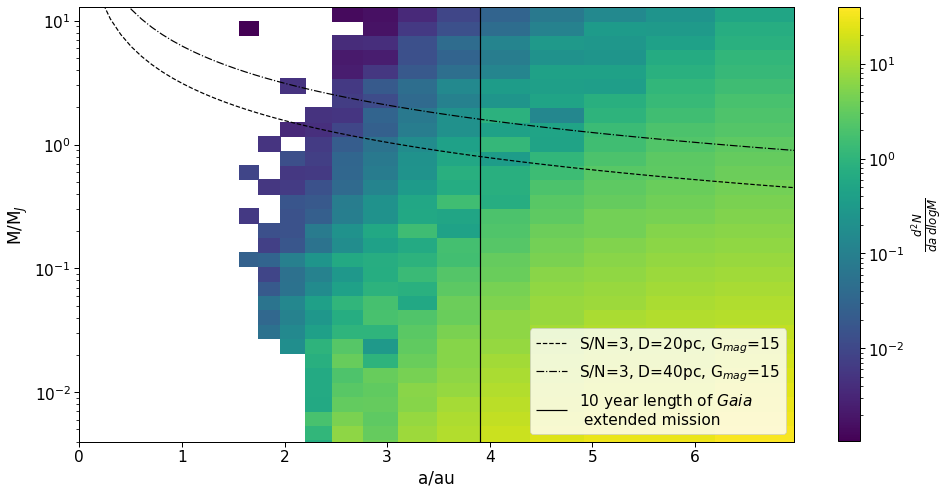

In [59]:
with sns.plotting_context('paper',font_scale=1.75):
    plt.figure(figsize=[16,8])
    plt.hist2d(data_ne_ran['a_f'],data_ne_ran['M'],weights=data_ne_ran['count_weight']*data_ne_ran['a_f']/np.log10(np.exp(1)),bins=[a_edges_ran,mbins_unlog],norm=mcolors.LogNorm())
    #plt.scatter(data_ne_ran['a_f'],data_ne_ran['M'],c='black',marker='x')
    plt.plot(a_in[1:],d1,color='black',linestyle='--',label='S/N=3, D=20pc, G$_{mag}$=15')
    plt.plot(a_in[1:],d2,color='black',linestyle='-.',label='S/N=3, D=40pc, G$_{mag}$=15')
    plt.yscale('log')
    plt.vlines(3.91,min(data_ne_ran['M']),max(data_ne_ran['M']),color='black',linestyle='-',label='10 year length of $Gaia$ \n extended mission')
    plt.xlabel('a/au')
    plt.ylabel('M/M$_J$')
    plt.xlim([0,np.max(a_edges_ran)])
    plt.ylim([4e-3,13])
    plt.legend(loc='lower right')
    #plt.title('Number of planets around a white dwarf per log semi-major axis and log M for a 1M$_\odot$ progenitor')
    #plt.text(8.1,-1.5,'a bins={} \nlog M bins={}'.format(nbins_a,nbins_m),color='black',bbox=dict(boxstyle='square', fc="w", ec="w",alpha=0.8))
    plt.colorbar(label=r'$\frac{d^2N}{da\:dlogM}$')
    plt.savefig('../../Plots/final_planet_distribution1p0_ran.pdf',bbox_inches='tight')
    

## Save this data for number of detected planets <a class="anchor" id="save"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [58]:
label='final'
#np.savetxt('wd_distribution_{}.csv'.format(label),hist_val_wd_ran,delimiter=',')
#np.savetxt('error_distribution_{}.csv'.format(label),error_val_wd_ran,delimiter=',')
#np.savetxt('wd_a_edges.csv',a_edges_ran,delimiter=',')
#np.savetxt('wd_m_edges.csv',m_edges,delimiter=',')